# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D,BatchNormalization, LeakyReLU,ReLU, Dropout, Activation , concatenate , Add
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

def inception_module(x,f):

  t1 = Conv2D(filters=f,kernel_size=1,strides=1,padding='same')(x)
  t1 = BatchNormalization()(t1)
  t1 = ReLU()(t1)

  t2 = Conv2D(filters=f,kernel_size=3,strides=1,padding='same')(t1)
  t2 = BatchNormalization()(t2)
  t2 = ReLU()(t2)

  t3 = Conv2D(filters=f,kernel_size=5,strides=1,padding='same')(t1)
  t3 = BatchNormalization()(t3)
  t3 = ReLU()(t3)

  t4 = MaxPooling2D((3, 3), strides=1, padding='same')(x)
  t4 = Conv2D(filters=f,kernel_size=1,strides=1,padding='same')(t4)
  t4 = BatchNormalization()(t4)
  t4 = ReLU()(t4)

  inception_block = concatenate([t1, t2, t3, t4], axis=-1)

  return inception_block


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1]

0.36862746

In [6]:
input_layer = Input((32,32,3))

x = inception_module(input_layer,16)
x = inception_module(x,32)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 16)           64        ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 16)           64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 32, 32, 16)           0         ['batch_normalization[0][0

# train

In [8]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [9]:
history = model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 45s 19ms/step - loss: 1.4163 - accuracy: 0.5034 - val_loss: 1.0494 - val_accuracy: 0.6278
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0311 - accuracy: 0.6384 - val_loss: 0.9696 - val_accuracy: 0.6578
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8804 - accuracy: 0.6923 - val_loss: 0.9666 - val_accuracy: 0.6627
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7574 - accuracy: 0.7358 - val_loss: 0.9816 - val_accuracy: 0.6619
Epoch 5/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6388 - accuracy: 0.7776 - val_loss: 0.9063 - val_accuracy: 0.6955
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5270 - accuracy: 0.8180 - val_loss: 0.9950 - val_accuracy: 0.6782
Epoch 7/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.4274 - accuracy: 0.8507 - val_loss: 0.9838 -

In [10]:
model.layers[6].get_weights()

[array([[[[ 6.51527718e-02,  6.66876882e-03, -1.23420894e-01, ...,
           -3.88969034e-02,  1.79030001e-02, -1.68286730e-02],
          [ 1.90184675e-02,  2.35057715e-02,  3.94273624e-02, ...,
            3.67537849e-02,  2.99917441e-02, -1.89029872e-02],
          [-5.32977469e-02,  5.96193187e-02,  9.67795104e-02, ...,
            3.45657207e-02, -4.11765743e-03, -8.72445554e-02],
          ...,
          [ 1.10585694e-04, -8.95896554e-02,  7.49790668e-02, ...,
           -7.31607527e-02,  6.30496666e-02, -1.08024096e-02],
          [-1.59207638e-02,  7.38607049e-02, -3.30886170e-02, ...,
           -4.98924032e-03, -1.01618297e-01,  4.20410484e-02],
          [-6.55287504e-02,  1.01718277e-01, -9.42569785e-03, ...,
            5.96765615e-02,  7.31101558e-02,  1.04122058e-01]],
 
         [[-3.19430232e-02, -3.74738313e-02, -6.47825515e-03, ...,
            1.06942505e-02,  1.68758824e-01, -7.67096654e-02],
          [ 5.29712662e-02,  1.32204005e-02,  3.28584276e-02, ...,
     

# analysis

In [11]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 2s 78ms/step - loss: 1.1277 - accuracy: 0.6993


[1.12773859500885, 0.6992999911308289]

In [12]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 4ms/step


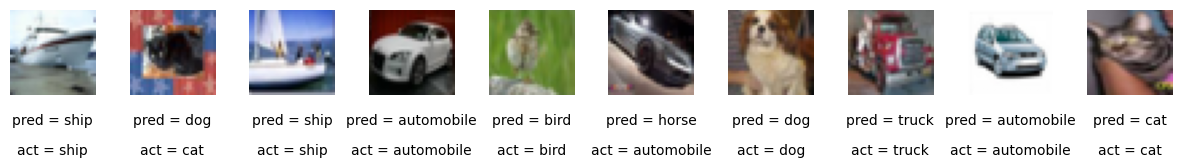

In [13]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


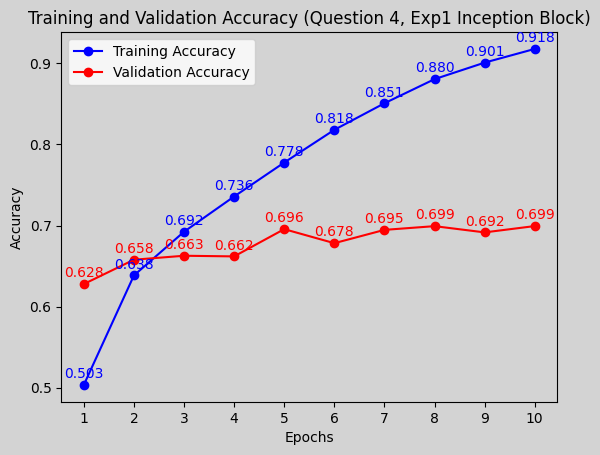

In [14]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy',color='blue',marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy',color='red',marker='o')

for i, txt in enumerate(train_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], train_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='blue')

for i, txt in enumerate(val_accuracy):
    plt.annotate(f'{txt:.3f}', (epochs[i], val_accuracy[i]), textcoords="offset points", xytext=(0, 5), ha='center', color='red')


plt.title('Training and Validation Accuracy (Question 4, Exp1 Inception Block)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.xticks(epochs)

plt.legend()

In [15]:
import csv

csv_file_path = 'Q4.csv'

with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)

header = rows[0]
new_column = ['Ex1_trainacc','Ex1_valacc']

for column in new_column:
    if column not in header:
        header.append(column)

rows[0] = header

for row, t_acc, v_acc in zip(rows[1:], train_accuracy,val_accuracy ):
    row.extend([t_acc, v_acc])

with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

print(f"Accuracy values have been appended to new rows in {csv_file_path}")

Accuracy values have been appended to new rows in Q4.csv
